# Zoning tagger

In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.7 662..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


## Using OSM data

In [2]:
from my_package.methods.zoning_tagger import ZoningTagger

zt = ZoningTagger(blocks_gdf)
zoning_gdf = zt.run()

2025-01-18 13:03:09.256 | WARNING  | my_package.methods.zoning_tagger:run:75 - No landuse data is provided
2025-01-18 13:03:09.257 | INFO     | my_package.methods.zoning_tagger:fetch_osm:30 - Fetching OSM data
2025-01-18 13:03:20.444 | SUCCESS  | my_package.methods.zoning_tagger:fetch_osm:35 - OSM data fetched
2025-01-18 13:03:20.465 | INFO     | my_package.methods.zoning_tagger:_process_data:39 - Processing data
2025-01-18 13:03:20.544 | SUCCESS  | my_package.methods.zoning_tagger:_process_data:44 - Data processed
2025-01-18 13:03:20.568 | INFO     | my_package.methods.zoning_tagger:_get_probabilities:48 - Calculating probabilities
2025-01-18 13:03:28.604 | SUCCESS  | my_package.methods.zoning_tagger:_get_probabilities:69 - Probabilities calculated


In [3]:
zoning_gdf

,geometry,tags_probabilities,zoning_tag,tags
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...","{Tag.PUBLIC_AND_BUSINESS: 0.01600582012538488,...",Tag.PUBLIC_AND_BUSINESS,[Tag.PUBLIC_AND_BUSINESS]
1,"POLYGON ((355412.142 6623378.149, 355411.7 662...",{Tag.ENGINEERING_AND_TRANSPORTATION: 0.2226509...,Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",{},None,[]
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...","{Tag.RESIDENTIAL: 0.25916824038067937, Tag.IND...",Tag.RESIDENTIAL,[Tag.RESIDENTIAL]
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",{Tag.RESIDENTIAL: 0.014748336981305357},Tag.RESIDENTIAL,[Tag.RESIDENTIAL]
...,...,...,...,...
16315,"POLYGON ((335210.252 6655823.328, 335105.217 6...",{},None,[]
16316,"POLYGON ((315582.435 6679561.357, 315523.467 6...",{},None,[]
16317,"POLYGON ((316419.909 6679189.653, 316319.749 6...",{Tag.ENGINEERING_AND_TRANSPORTATION: 0.8146643...,Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]
16318,"POLYGON ((315709.232 6679519.841, 315748.877 6...",{Tag.ENGINEERING_AND_TRANSPORTATION: 0.0684593...,Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]


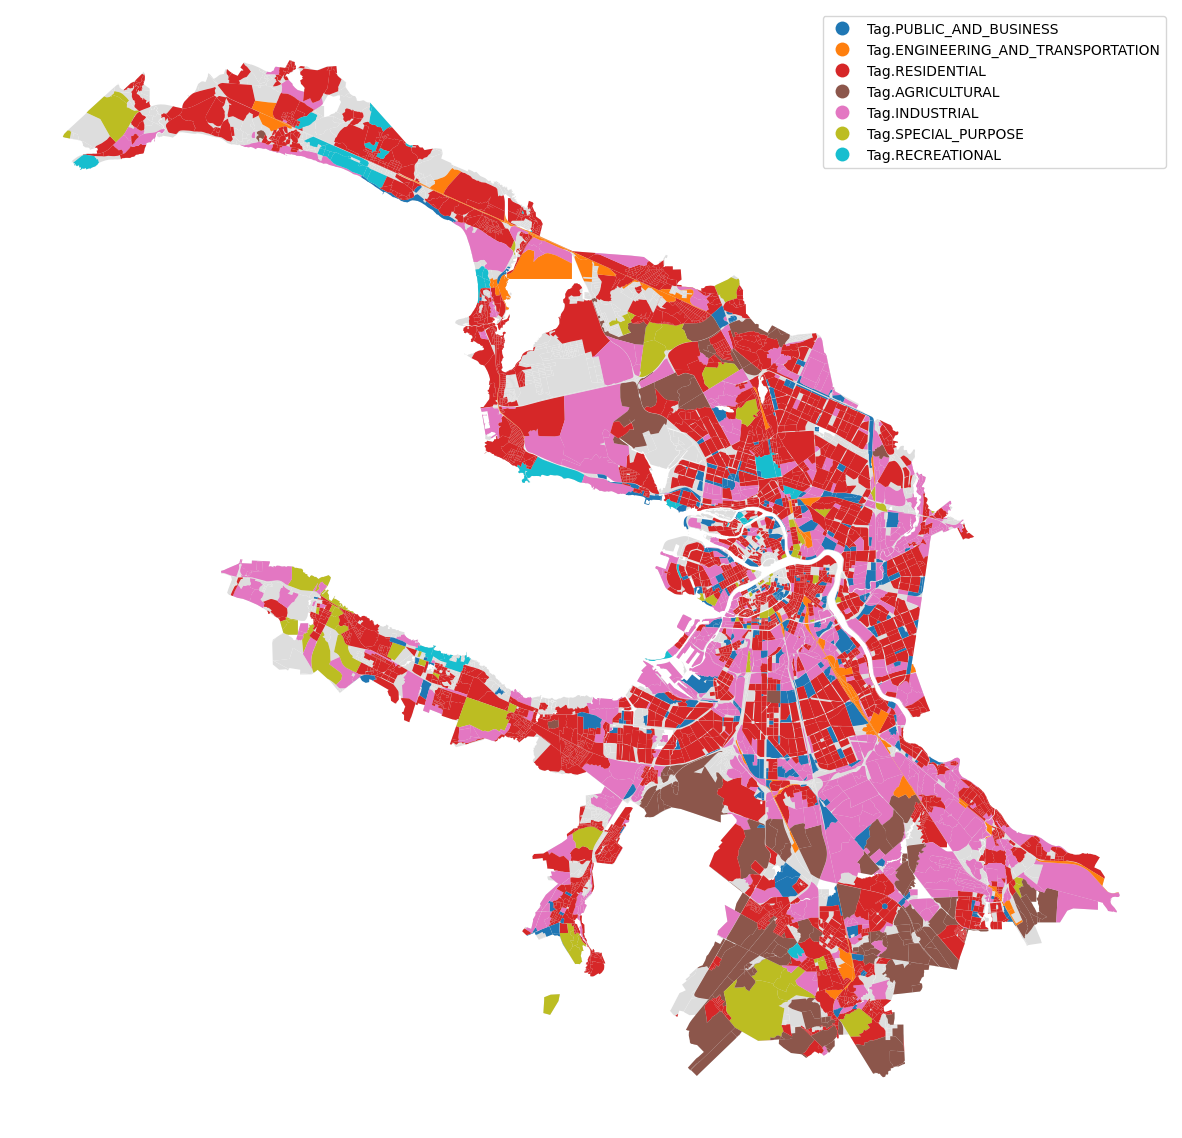

In [4]:
ax = zoning_gdf.plot(color='#ddd', figsize=(15,15))
zoning_gdf.plot(column='zoning_tag', legend=True, ax=ax).set_axis_off()

## Using LandUse data

In [5]:
lu_gdf = gpd.read_parquet('./data/landuse.parquet')
lu_gdf.head()

,landuse,geometry
0,Т1Ж2-2,"MULTIPOLYGON (((349202.695 6660862.796, 349199..."
1,Т1Ж2-2,"MULTIPOLYGON (((345558.116 6666406.372, 345528..."
2,Т1Ж2-2,"MULTIPOLYGON (((347805.242 6663237.649, 347790..."
3,Т1Ж2-2,"MULTIPOLYGON (((346292.257 6667294.593, 346266..."
4,Т1Ж2-2,"MULTIPOLYGON (((350166.384 6660332.141, 350186..."


In [6]:
from my_package.models.tag import Tag

lu_dict = {
    Tag.RESIDENTIAL: ['Т1Ж1', 'Т1Ж2-1', 'Т1Ж2-2', 'Т2Ж1', 'Т2ЖД2', 'Т3Ж1', 'Т3Ж2', 'Т3ЖД3'],
    Tag.PUBLIC_AND_BUSINESS : ['ТД1-1_1', 'ТД1-1_2', 'ТД1-2_1', 'ТД1-2_2', 'ТД1-3', 'ТД2_1', 'ТД2_2', 'ТД3'],
    Tag.INDUSTRIAL : ['ТИП1', 'ТИ2', 'ТИП3', 'ТИП4', 'ТПД1_1', 'ТПД1_2', 'ТПД1_3', 'ТПД2_1', 'ТПД2_2', 'ТПД2_3'],
    Tag.ENGINEERING_AND_TRANSPORTATION : ['ТИ1-1', 'ТИ1-2', 'ТИ2', 'ТИ3', 'ТИ4-1', 'ТИ4-2'],
    Tag.AGRICULTURAL : ['ТС1', 'ТС2'],
    Tag.RECREATIONAL : ['ТР0-1', 'ТР0-2', 'ТР1', 'ТР2', 'ТР3-1', 'ТР3-2', 'ТР3-3', 'ТР4', 'ТР5-1', 'ТР5-2'],
    Tag.SPECIAL_PURPOSE : ['ТК1', 'ТК2', 'ТК3']
}

lu_to_tag = {lu : tag for tag, lus in lu_dict.items() for lu in lus}
lu_to_tag

{'Т1Ж1': <Tag.RESIDENTIAL: 'Жилая зона'>,
 'Т1Ж2-1': <Tag.RESIDENTIAL: 'Жилая зона'>,
 'Т1Ж2-2': <Tag.RESIDENTIAL: 'Жилая зона'>,
 'Т2Ж1': <Tag.RESIDENTIAL: 'Жилая зона'>,
 'Т2ЖД2': <Tag.RESIDENTIAL: 'Жилая зона'>,
 'Т3Ж1': <Tag.RESIDENTIAL: 'Жилая зона'>,
 'Т3Ж2': <Tag.RESIDENTIAL: 'Жилая зона'>,
 'Т3ЖД3': <Tag.RESIDENTIAL: 'Жилая зона'>,
 'ТД1-1_1': <Tag.PUBLIC_AND_BUSINESS: 'Общественно-деловая'>,
 'ТД1-1_2': <Tag.PUBLIC_AND_BUSINESS: 'Общественно-деловая'>,
 'ТД1-2_1': <Tag.PUBLIC_AND_BUSINESS: 'Общественно-деловая'>,
 'ТД1-2_2': <Tag.PUBLIC_AND_BUSINESS: 'Общественно-деловая'>,
 'ТД1-3': <Tag.PUBLIC_AND_BUSINESS: 'Общественно-деловая'>,
 'ТД2_1': <Tag.PUBLIC_AND_BUSINESS: 'Общественно-деловая'>,
 'ТД2_2': <Tag.PUBLIC_AND_BUSINESS: 'Общественно-деловая'>,
 'ТД3': <Tag.PUBLIC_AND_BUSINESS: 'Общественно-деловая'>,
 'ТИП1': <Tag.INDUSTRIAL: 'Производственная'>,
 'ТИ2': <Tag.ENGINEERING_AND_TRANSPORTATION: 'Инженерная и транспортная инфраструктура'>,
 'ТИП3': <Tag.INDUSTRIAL: 'Производ

In [7]:
from my_package.methods.zoning_tagger import ZoningTagger

zt = ZoningTagger(blocks_gdf, lu_to_tag)
zoning_gdf = zt.run(lu_gdf)

2025-01-18 13:03:31.907 | INFO     | my_package.methods.zoning_tagger:_process_data:39 - Processing data
2025-01-18 13:03:31.911 | SUCCESS  | my_package.methods.zoning_tagger:_process_data:44 - Data processed
2025-01-18 13:03:31.912 | INFO     | my_package.methods.zoning_tagger:_get_probabilities:48 - Calculating probabilities
2025-01-18 13:03:42.156 | SUCCESS  | my_package.methods.zoning_tagger:_get_probabilities:69 - Probabilities calculated


In [8]:
zoning_gdf

,geometry,tags_probabilities,zoning_tag,tags
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",{Tag.ENGINEERING_AND_TRANSPORTATION: 0.0073089...,Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]
1,"POLYGON ((355412.142 6623378.149, 355411.7 662...",{Tag.ENGINEERING_AND_TRANSPORTATION: 0.5944823...,Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...","{Tag.RECREATIONAL: 0.854630117163995, Tag.SPEC...",Tag.RECREATIONAL,[Tag.RECREATIONAL]
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",{Tag.ENGINEERING_AND_TRANSPORTATION: 0.0522894...,Tag.RESIDENTIAL,[Tag.RESIDENTIAL]
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",{Tag.RECREATIONAL: 0.0002040136808147663},Tag.RECREATIONAL,[Tag.RECREATIONAL]
...,...,...,...,...
16315,"POLYGON ((335210.252 6655823.328, 335105.217 6...",{Tag.ENGINEERING_AND_TRANSPORTATION: 1.0000000...,Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]
16316,"POLYGON ((315582.435 6679561.357, 315523.467 6...",{Tag.ENGINEERING_AND_TRANSPORTATION: 1.0},Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]
16317,"POLYGON ((316419.909 6679189.653, 316319.749 6...",{Tag.ENGINEERING_AND_TRANSPORTATION: 0.9999999...,Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]
16318,"POLYGON ((315709.232 6679519.841, 315748.877 6...",{Tag.ENGINEERING_AND_TRANSPORTATION: 1.0000000...,Tag.ENGINEERING_AND_TRANSPORTATION,[Tag.ENGINEERING_AND_TRANSPORTATION]


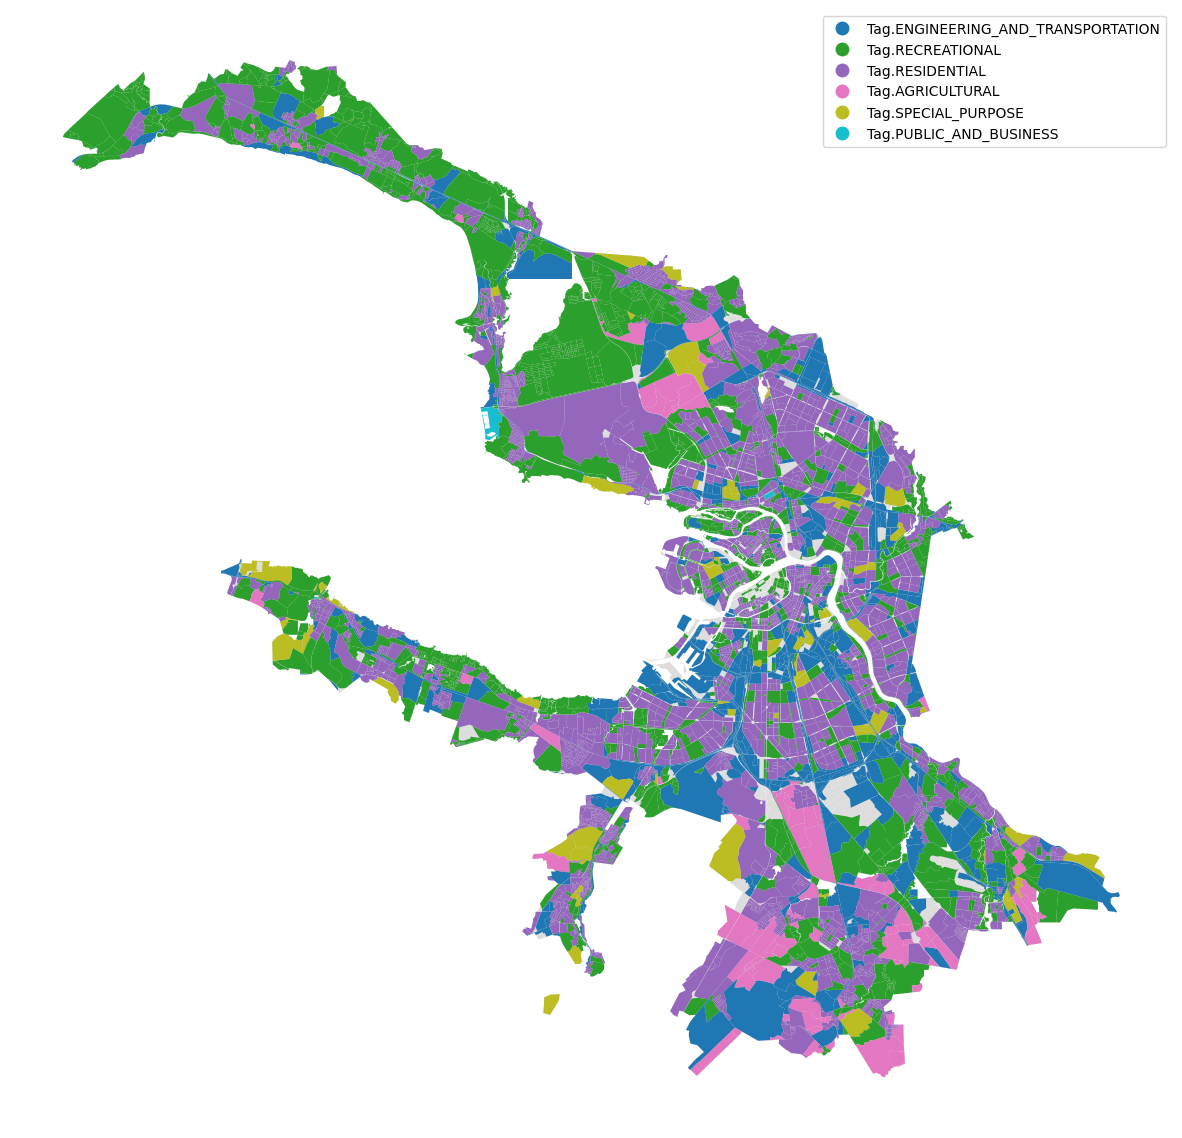

In [9]:
ax = zoning_gdf.plot(color='#ddd', figsize=(15,15))
zoning_gdf.plot(column='zoning_tag', legend=True, ax=ax).set_axis_off()